In [97]:
#from TMP117 import TMP117

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class TMP117():
    def __init__(self, time_step, duration, activeTimeParams): 
        self.time_step = time_step
        self.duration = duration
        self.time = np.arange(0, duration, time_step) #time at which to collect data
        self.activeTimeParams = activeTimeParams
        
#    def errorCheck():
#         for 
#             if convCycleTime == 0:
#                 print("error. conv cycle time cannot be zero, please check parameters again.")
                
    def computePower(self, num_averages, convCycleTime, mode):
        activeCurrentConsumption = 135 # micro amps
        activeConversionTime = num_averages*0.0155

        standByCurrentConsumption = 1.25 # micro amps
        standbyTime = convCycleTime - activeConversionTime
        
        SDcurrent = 250/ 1000000 # micro amps
        
        if mode == "CC":
            current = ((activeCurrentConsumption*activeConversionTime)+(standByCurrentConsumption*standbyTime))/convCycleTime

        elif mode == "OS":
            current = ((activeCurrentConsumption*activeConversionTime)+(SDcurrent*standbyTime))/convCycleTime
            
        power = (current * 3.3)/1000 # milli watts
        
        return power
    
    def getAllModesPower(self):
        length = len(self.time)
        power_arr = [0] * length # creating corresponding power array to time intervals, default values

        # check if the given start and end time is a valid value in the time array and round to nearest value 
        for times in self.activeTimeParams:
            start_index = int(times[0] / self.time_step) # getting index of the closest value to active times 
            end_index = int(times[1] / self.time_step)

            if start_index < 0 or end_index > len(self.time): # not valid time
                print("Error. Index not valid.")
                return -1

            mode = self.activeTimeParams[times][2]
            averages = self.activeTimeParams[times][0]
            convCycle = self.activeTimeParams[times][1]
            power = self.computePower(averages, convCycle, mode)
            for i in range(start_index, end_index):
                power_arr[i] = power
        
        return power_arr
            
    def getAllModesData(self):
        '''
        The data in the result register is in two's complement format, 
        has a data width of 16 bits and a resolution of 7.8125 m°C.
        
        Changing the conversion cycle period also affects the temperature result update rate because the temperature 
        result register is updated at the end of every active conversion. 
        
        Storing 16-bit value at the end of each conversion cycle
        '''
        
        bits_per_cycle = 16
        
        length = len(self.time)
        data_arr = [0] * length # creating corresponding power array to time intervals, default values 
        data_accumulated = 0
        
        for times in self.activeTimeParams: # for each active period
            start_index = int(times[0] / self.time_step) 
            end_index = int(times[1] / self.time_step)
            
            #calculating data per step in active time period
            convCycle = self.activeTimeParams[times][1]
            bits_per_second = bits_per_cycle / convCycle # bits per second
            activeTimeTotal = times[1]-times[0] # getting num of seconds of active period
            bits_total = bits_per_second * activeTimeTotal # total bits during that active period
            num_steps = end_index-start_index 
            bits_per_step = bits_total / num_steps
            #indexes[time] = bits_per_step
            
            for i in range(start_index, length):
                if i < end_index:
                    data_accumulated += bits_per_step
                    
                data_arr[i] = data_accumulated 
            
        return data_arr

    def Simulation(self):
        power = self.getAllModesPower()
        data = self.getAllModesData()

        return power, data, self.time

# Temperature Sensor Configurations

***Continuous conversion mode:*** The device continuously performs temperature conversions in this mode, as shown in Figure 7-3, and updates the temperature result register at the end of every active conversion  
***One-shot mode:*** After the device completes a (temperature conversion) one-shot conversion, the device goes to the *low-power shutdown mode*.  

### Parameters for TMP117 (to be changed by teams)  
...add more explanation of what each input does later  
add explanation of what possible inputs including default are for each input ...  

**Continuous conversion (if selected) params**:  
**possible conversion cycle times (see column 1 of table below)**: 0.0155, 0.125, 0.25, 0.5, 1, 4, 8, 16  
**possible averaging inputs**: 0, 8, 32, 64


In [99]:
#Image("convTimes.png")

#### TO-DO (teams set inputs)

In [104]:
time_step = 0.0155
duration = 100

# params to set, CONV CYCLE TIME > TIME INTERVAL
time1 = (0, 5)
numaverage1 = 8
convCycleTime1 = 16
mode1 = "OS"

# time2 = (70, 70.5)
# numaverage2 = 8
# convCycleTime2 = 0.0155
# mode2 = "CC"

activeTimeParams = { time1: [numaverage1, convCycleTime1, mode1] }

In [105]:
x = TMP117(time_step, duration, activeTimeParams) # creating TMP117 class
power, data, time = x.Simulation() # getting power, data, time

In [102]:
#print(power)

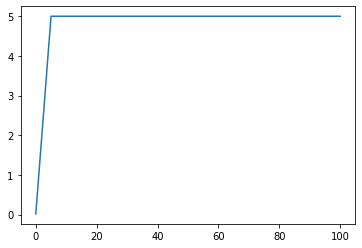

In [107]:
plt.plot(time, data);